# Transformer Flows

Let's examine the dynamical flows for transformer-based large language models 
with varying subsets of the layers. Let's start with GPT-2 (similar to [this](https://x.com/ABhargava2000/status/1738115765080125687) but with real transformer blocks from a pre-trained model rather than randomly initialized MHA).

In [1]:
import numpy 
import torch 
import torch.nn as nn
from transformers import AutoTokenizer, AutoModelForCausalLM

import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm 

/Users/aman/Documents/understanding_understanding/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load model directly
tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2")
model = AutoModelForCausalLM.from_pretrained("openai-community/gpt2")

In [3]:
# Constants
dt = 0.0001
num_seconds = 0.2
num_steps = int(abs(num_seconds / dt))
input_str = """According to all known laws
of aviation,
there is no way a bee
should be able to fly.
 :
Its wings are too small to get
its fat little body off the ground.
 :
The bee, of course, flies anyway
 :
because bees don't care
what humans think is impossible.
BARRY BENSON:
(Barry is picking out a shirt)
Yellow, black. Yellow, black.
Yellow, black. Yellow, black.
 :
Ooh, black and yellow!
Let's shake it up a little.
JANET BENSON:
Barry! Breakfast is ready!
BARRY:
Coming!
 :
Hang on a second.
(Barry uses his antenna like a phone)
 :
Hello?
ADAM FLAYMAN:
"""
# input_str = "According to all known laws of aviation, there is no way a bee should"
do_normalize = True
min_layer=0
max_layer=11
num_control_tokens = 128

In [4]:
# tokenize 
input_ids = tokenizer.encode(input_str, return_tensors="pt")

# run through model and save hidden_states
with torch.no_grad():
    outputs = model(input_ids, output_hidden_states=True)
    hidden_states = outputs.hidden_states

In [5]:
per_token_str = tokenizer.batch_decode(input_ids[0])
per_token_str

['According',
 ' to',
 ' all',
 ' known',
 ' laws',
 '\n',
 'of',
 ' aviation',
 ',',
 '\n',
 'there',
 ' is',
 ' no',
 ' way',
 ' a',
 ' bee',
 '\n',
 'should',
 ' be',
 ' able',
 ' to',
 ' fly',
 '.',
 '\n',
 ' :',
 '\n',
 'Its',
 ' wings',
 ' are',
 ' too',
 ' small',
 ' to',
 ' get',
 '\n',
 'its',
 ' fat',
 ' little',
 ' body',
 ' off',
 ' the',
 ' ground',
 '.',
 '\n',
 ' :',
 '\n',
 'The',
 ' bee',
 ',',
 ' of',
 ' course',
 ',',
 ' flies',
 ' anyway',
 '\n',
 ' :',
 '\n',
 'because',
 ' bees',
 ' don',
 "'t",
 ' care',
 '\n',
 'what',
 ' humans',
 ' think',
 ' is',
 ' impossible',
 '.',
 '\n',
 'B',
 'AR',
 'RY',
 ' BEN',
 'SON',
 ':',
 '\n',
 '(',
 'B',
 'arry',
 ' is',
 ' picking',
 ' out',
 ' a',
 ' shirt',
 ')',
 '\n',
 'Yellow',
 ',',
 ' black',
 '.',
 ' Yellow',
 ',',
 ' black',
 '.',
 '\n',
 'Yellow',
 ',',
 ' black',
 '.',
 ' Yellow',
 ',',
 ' black',
 '.',
 '\n',
 ' :',
 '\n',
 'O',
 'oh',
 ',',
 ' black',
 ' and',
 ' yellow',
 '!',
 '\n',
 'Let',
 "'s",
 ' shake',
 ' 

In [6]:
print("Length of input_ids: ", len(input_ids[0]))

Length of input_ids:  178


In [7]:
model

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

 - `hidden_states` is a list with length `num_layers = 13`
 - `hidden_states[i]` is `[batch=1, num_toks=5, d_model=768]`
 - There are 12 GPT-2 blocks resulting in 13 total hidden states (including before and after all 12 blocks).

In [8]:
[a.shape for a in hidden_states]

[torch.Size([1, 178, 768]),
 torch.Size([1, 178, 768]),
 torch.Size([1, 178, 768]),
 torch.Size([1, 178, 768]),
 torch.Size([1, 178, 768]),
 torch.Size([1, 178, 768]),
 torch.Size([1, 178, 768]),
 torch.Size([1, 178, 768]),
 torch.Size([1, 178, 768]),
 torch.Size([1, 178, 768]),
 torch.Size([1, 178, 768]),
 torch.Size([1, 178, 768]),
 torch.Size([1, 178, 768])]

In [9]:
o1, _ = model.transformer.h[0](hidden_states[0])
o1.shape

torch.Size([1, 178, 768])

In [10]:
def norm_x(x): 
    """ArithmeticError
    """

In [11]:
def run_model(x0, model, start_layer=0, end_layer=1):
    """ Run the model's layer `start_layer` to `end_layer` on the input `x0` """
    x = x0
    for i in range(start_layer, end_layer):
        # print("Running model layer: ", i)
        x, _ = model.transformer.h[i](x)
    return x

def compute_trajectory(x0, model, num_steps, dt, start_layer_idx=0, end_layer_idx=1, normalize=True, update_start_idx=0):
    x_list = []
    if normalize: 
        # x0_ = x0 / torch.norm(x0, dim=-1, keepdim=True)
        x0 = x0 / torch.norm(x0, dim=-1, keepdim=True)
        # x0[:, update_start_idx:, :] = x0_[:, update_start_idx:, :]

    x_list.append(x0)

    with torch.no_grad():
        for i in tqdm(range(num_steps)):
            dxdt = run_model(x_list[-1], model, start_layer=start_layer_idx, end_layer=end_layer_idx)
            masked_dxdt = torch.zeros_like(dxdt)
            masked_dxdt[:, update_start_idx:, :] = dxdt[:, update_start_idx:, :]
            x_ = x_list[-1] + dt * masked_dxdt
            x_list.append(x_)
            if normalize: 
                x_list_neg1_ = x_list[-1] / torch.norm(x_list[-1], dim=-1, keepdim=True)
                x_list[-1][:, update_start_idx:, :] = x_list_neg1_[:, update_start_idx:, :]
                # print("Norm of x_list[-1]: ", torch.norm(x_list[-1]))
    
    return x_list

In [12]:
# get trajectory 
print(f"With min_layer = {min_layer}\n\tmax_layer = {max_layer}")
x0 = hidden_states[0]
x0.shape

x_list = compute_trajectory(x0, model, num_steps, dt, start_layer_idx=min_layer, end_layer_idx=max_layer, normalize=do_normalize, update_start_idx=num_control_tokens)

With min_layer = 0
	max_layer = 11


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
  0%|          | 5/2000 [00:00<04:56,  6.72it/s]

In [ ]:
x0.shape

torch.Size([1, 178, 768])

In [ ]:
X = torch.cat(x_list, dim=0) # [num_t * batch, num_tok, d_model]

num_t = len(x_list)
batch = x_list[0].shape[0]
num_tok = x_list[0].shape[1]
d_model = x_list[0].shape[2]

# pretty print all the shapes
print("Shape of X: ", X.shape)
print("Number of time steps: ", num_t)
print("Batch size: ", batch)
print("Number of tokens: ", num_tok)
print("Hidden size: ", d_model)
print("Norm of X[0, :, :]: ", torch.norm(X[0, :, :]))

X = torch.cat(x_list, dim=0) # [num_t * batch, num_tok, d_model]

Shape of X:  torch.Size([2001, 178, 768])
Number of time steps:  2001
Batch size:  1
Number of tokens:  178
Hidden size:  768
Norm of X[0, :, :]:  tensor(13.3417)


In [ ]:
# find NAN entries
nan_entries = torch.isnan(X).sum()
print("Number of NAN entries: ", nan_entries)

Number of NAN entries:  tensor(0)


In [ ]:
# get flattened X of shape [num_t * batch * num_tok, d_model]
# X_flat = X.view(num_t * batch, num_tok * d_model).cpu().detach().numpy()
X_flat = X.view(num_t * batch * num_tok, d_model).cpu().detach().numpy()
X_flat.shape
X = X.cpu().detach().numpy()

print("X_flat shape: ", X_flat.shape)
print(f"Expected: [num_t * batch, num_tok * d_model] = [{num_t * batch}, {num_tok * d_model}]")

X_flat shape:  (356178, 768)
Expected: [num_t * batch, num_tok * d_model] = [2001, 136704]


In [ ]:
# idx = 2

# np.linalg.norm(X[3, idx, :])
# np.linalg.norm(X[idx, :, :])

In [ ]:
# np.linalg.norm(X_flat[0, (idx*768):(768*(idx+1))])
# np.linalg.norm(X_flat[idx, :])

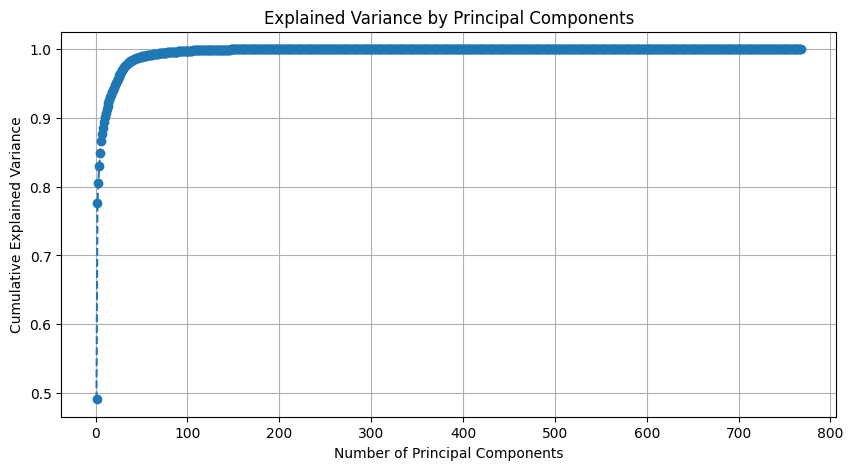

(array([[-5.9407878e-01, -4.0448982e-01, -1.1940873e-01, ...,
          6.4860251e-07, -5.4350676e-07,  4.0860325e-03],
        [-6.6189206e-01, -4.6087307e-01, -4.6549082e-02, ...,
          1.2073961e-06, -6.0869934e-07,  1.0386705e-03],
        [-6.8662739e-01, -5.0434577e-01, -1.2700060e-01, ...,
         -2.0076368e-07, -1.8212813e-06, -2.6017427e-04],
        ...,
        [ 4.4039413e-01, -6.9398209e-02, -7.1986541e-03, ...,
          8.6411546e-06, -1.8653715e-05,  8.8544190e-04],
        [ 4.4039091e-01, -6.9398075e-02, -7.1871728e-03, ...,
          8.8412726e-06, -1.9029096e-05,  8.8191032e-04],
        [ 4.4038782e-01, -6.9397748e-02, -7.1756765e-03, ...,
          9.0349295e-06, -1.9401450e-05,  8.7858737e-04]], dtype=float32),
 array([4.90965158e-01, 2.85151809e-01, 2.86897160e-02, 2.56258007e-02,
        1.87698565e-02, 1.71841681e-02, 9.96310543e-03, 9.63823497e-03,
        7.76628405e-03, 6.99636899e-03, 6.18854631e-03, 5.39682154e-03,
        4.95236041e-03, 4.32698987

In [ ]:
# do PCA on X_flat:np.ndarray of shape [num_vectors, vector_dim]


# Assuming X_flat is your data matrix of shape [num_vectors, vector_dim]

# Step 1: Standardize the data (if necessary)
# X_flat = (X_flat - np.mean(X_flat, axis=0)) / np.std(X_flat, axis=0)

# Step 2: Perform PCA
pca = PCA()
pca.fit(X_flat)

# Transform the data
X_pca = pca.transform(X_flat)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot the explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()

# Output the transformed data and explained variance
X_pca, explained_variance

In [ ]:
X_flat.shape

(356178, 768)

In [ ]:
torch.norm(torch.tensor(X_flat[0, :]))

tensor(1.0000)

In [ ]:
X_pca.shape

(356178, 768)

In [ ]:
# reshape X_pca back to [num_t, batch, num_tok, d_model]
X_pca = X_pca.reshape(num_t * batch, num_tok, d_model)
X_pca.shape

(2001, 178, 768)

/var/folders/vr/20rp0dnj727bj3pnb20qlwpw0000gn/T/ipykernel_85014/2313467307.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('tab10')


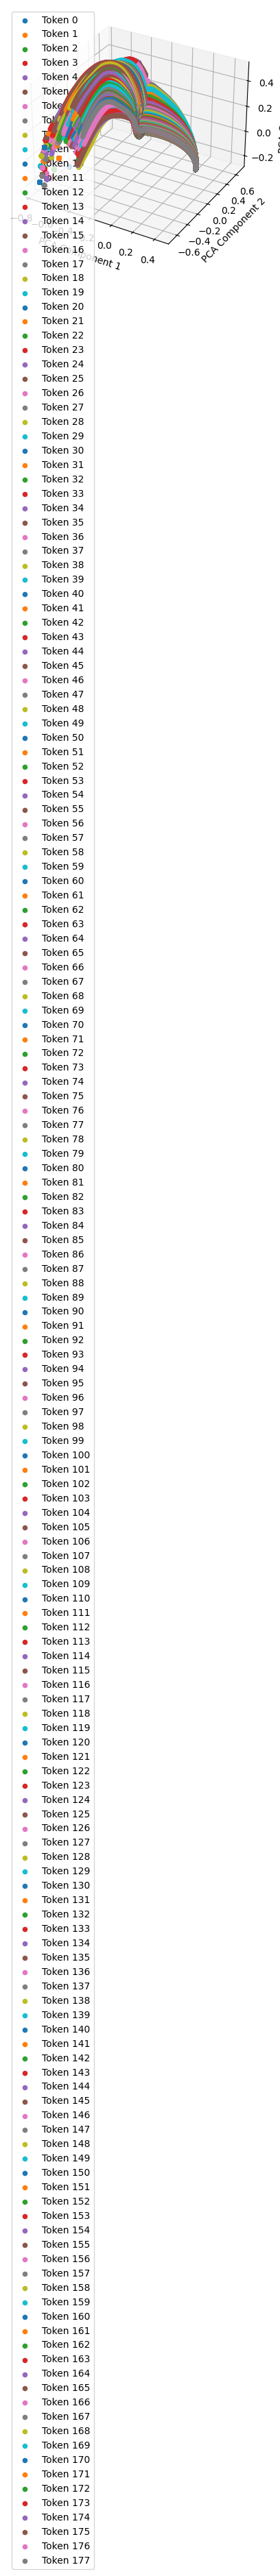

In [ ]:
X_pca_3 = X_pca[:, :, :3]
X_pca_3.shape

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import get_cmap

# Assuming X_pca is your tensor
num_time_steps, num_tokens, _ = X_pca.shape

# Generate a colormap
cmap = get_cmap('tab10')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for token_idx in range(num_tokens):
    x = X_pca[:, token_idx, 0]
    y = X_pca[:, token_idx, 1]
    z = X_pca[:, token_idx, 2]
    ax.scatter(x, y, z, color=cmap(token_idx % 10), label=f'Token {token_idx}')

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.legend()

plt.show()


In [ ]:
from datetime import datetime
# get current datetime stamp AOE in YYYYMMDDHHMMSS format
now_aoe = datetime.now().strftime("%Y%m%d%H%M%S")
now_aoe


'20240715165329'

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
for token_idx in range(num_tokens):
    x = X_pca[:, token_idx, 0]
    y = X_pca[:, token_idx, 1]
    z = X_pca[:, token_idx, 2]

    token_str = per_token_str[token_idx]
    
    # Create hover text
    hover_text = [f"Token idx: {token_idx}<br>Token Str: {per_token_str[token_idx]}<br>Timestep: {i}<br>dim1={x[i]}<br>dim2={y[i]}<br>dim3={z[i]}" for i in range(len(x))]
    
    fig.add_trace(go.Scatter3d(
        x=x, y=y, z=z,
        mode='markers',
        marker=dict(
            size=5,
            color=token_idx,  # Color by token index
            colorscale='Viridis',
            opacity=0.8
        ),
        name=f'Token {token_idx}',
        text=hover_text,  # Add hover text
        hoverinfo='text'  # Show only the hover text
    ))

fig.update_layout(
    scene=dict(
        xaxis_title='PCA Component 1',
        yaxis_title='PCA Component 2',
        zaxis_title='PCA Component 3'
    ),
    legend_title_text='Tokens', 
    title=f'PCA of Hidden States from layers {min_layer} - {max_layer} for dt = {dt}, T={num_seconds}, num_steps={num_steps}, normalize={do_normalize}, num_control_tokens={num_control_tokens},  input_str={input_str}'
)

# Save figure as html
fig.write_html(f"{now_aoe}pca_plot.html")

In [ ]:
import plotly.graph_objects as go

d1 = 34
d2 = 33
d3 = 35

fig = go.Figure()
for token_idx in range(num_tokens):
    x = X[:, token_idx, d1]
    y = X[:, token_idx, d2]
    z = X[:, token_idx, d3]
    token_str = per_token_str[token_idx]
    
    # Create hover text
    hover_text = [f"Token idx: {token_idx}<br>Token Str: {per_token_str[token_idx]}<br>Timestep: {i}<br>dim1={x[i]}<br>dim2={y[i]}<br>dim3={z[i]}" for i in range(len(x))]
    
    fig.add_trace(go.Scatter3d(
        x=x, y=y, z=z,
        mode='markers',
        marker=dict(
            size=5,
            color=token_idx,  # Color by token index
            colorscale='Viridis',
            opacity=0.8
        ),
        name=f'Token {token_idx}',
        text=hover_text,  # Add hover text
        hoverinfo='text'  # Show only the hover text
    ))

fig.update_layout(
    scene=dict(
        xaxis_title='PCA Component 1',
        yaxis_title='PCA Component 2',
        zaxis_title='PCA Component 3'
    ),
    legend_title_text='Tokens', 
    title=f'dims={d1},{d2},{d3} of Hidden States from layers {min_layer} - {max_layer} for dt = {dt}, T={num_seconds}, num_steps={num_steps}, normalize={do_normalize}, num_control_tokens={num_control_tokens}, input_str={input_str}'
)

# Save figure as html
fig.write_html(f"{now_aoe}non_pca_plot.html")